In [272]:
import pandas as pd
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [273]:
file_path = r"C:/Users/subha/OneDrive/Desktop/ADS 2/Mall_Customers.csv"
mall_data = pd.read_csv(file_path)

In [274]:
mall_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Visualizations**

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import numpy as np

In [277]:
# Data description

data_description = mall_data.describe()

1. Histogram of Annual Income

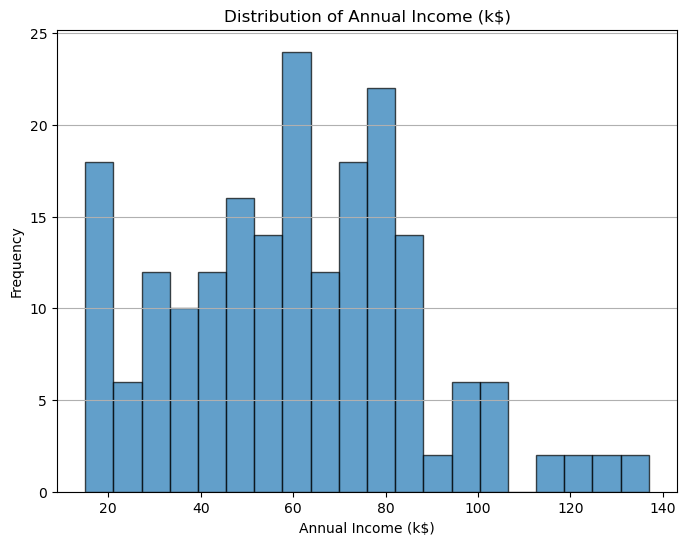

In [279]:
#plotting Histrogram

plt.figure(figsize=(8, 6))

plt.hist(mall_data['Annual Income (k$)'], bins=20, edgecolor='k', alpha=0.7)

plt.title('Distribution of Annual Income (k$)')

plt.xlabel('Annual Income (k$)')

plt.ylabel('Frequency')

plt.grid(axis='y')

plt.show()

2. Scatter plot: Age vs Spending Score

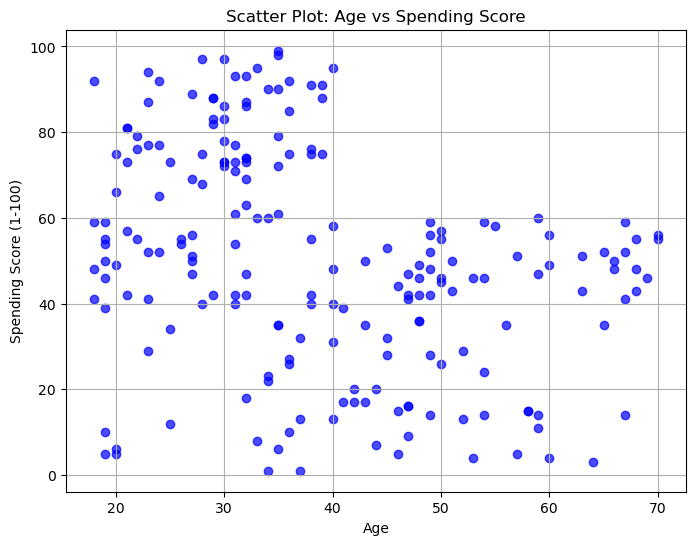

In [281]:
#plotting scatter graph

plt.figure(figsize=(8, 6))

plt.scatter(mall_data['Age'], mall_data['Spending Score (1-100)'], alpha=0.7, c='blue')

plt.title('Scatter Plot: Age vs Spending Score')

plt.xlabel('Age')

plt.ylabel('Spending Score (1-100)')

plt.grid(True)

plt.show()

3. Heatmap of correlations

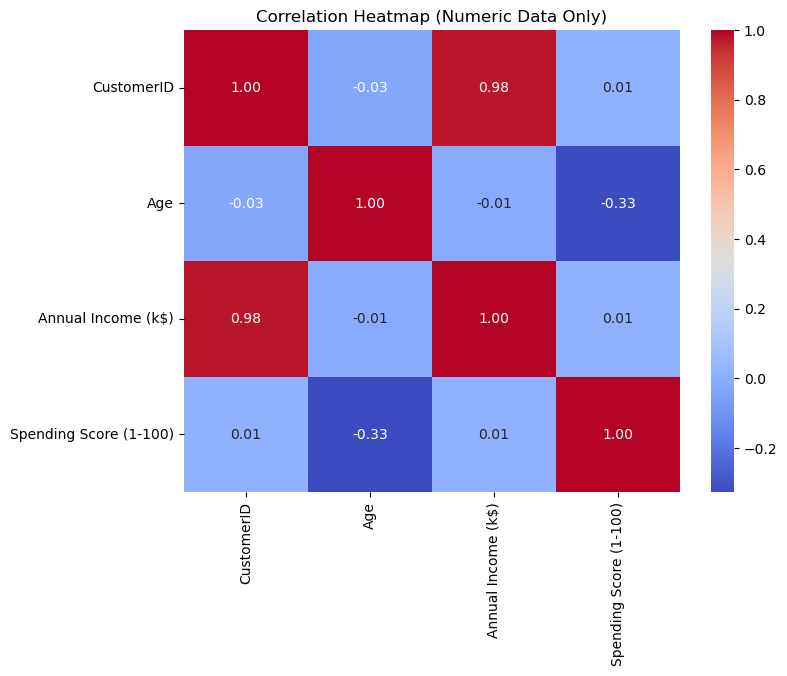

In [283]:
# Selecting only numeric columns for the correlation matrix

numeric_columns = mall_data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

# Plotting the heatmap for correlations

plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap (Numeric Data Only)')

plt.show()



4. Elbow Plot for k-means clustering

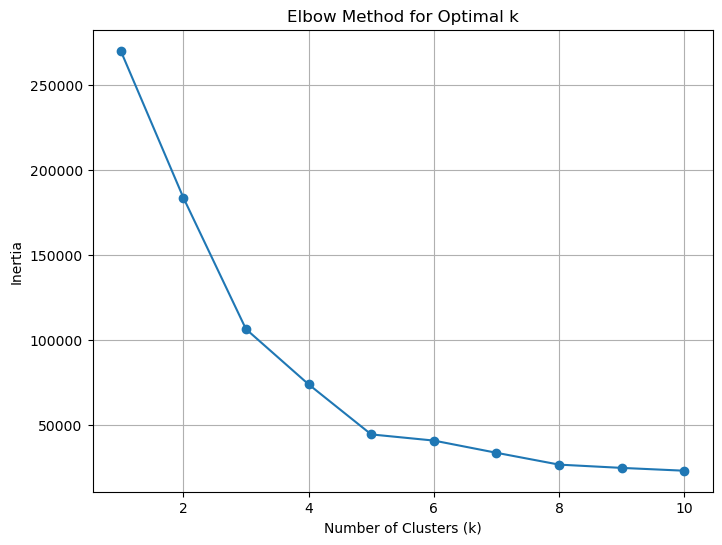

In [285]:
#Elbow plot

X = mall_data[['Annual Income (k$)', 'Spending Score (1-100)']]
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

**K-means clustering with k=5 (chosen based on the Elbow Method)**

In [287]:
from sklearn.cluster import KMeans

def perform_kmeans_clustering(data, n_clusters):

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    return cluster_labels, kmeans

# Selecting only numeric columns for clustering
numeric_data = mall_data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Perform K-Means Clustering
cluster_labels, kmeans_model = perform_kmeans_clustering(numeric_data, n_clusters=3)
print("Cluster Centers:", kmeans_model.cluster_centers_)

Cluster Centers: [[87.         18.63157895]
 [86.53846154 82.12820513]
 [44.15447154 49.82926829]]


In [288]:
kmeans = KMeans(n_clusters=5, random_state=42)

mall_data['Cluster'] = kmeans.fit_predict(X)

Scatter plot with clusters

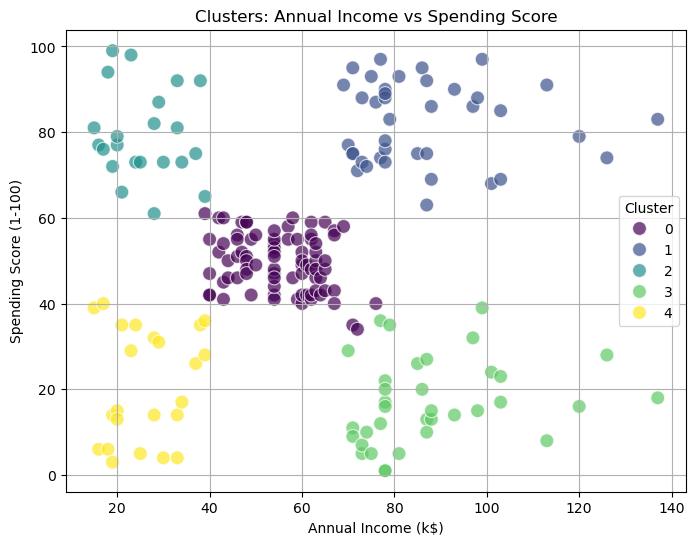

In [290]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=mall_data, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster', palette='viridis', s=100, alpha=0.7)

plt.title('Clusters: Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

5.Line fitting: Age vs Spending Score

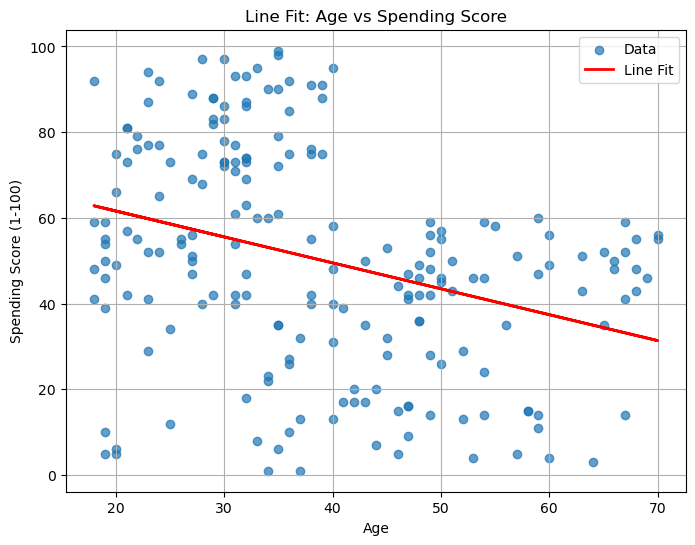

In [292]:
X_line = mall_data['Age'].values.reshape(-1, 1)
y_line = mall_data['Spending Score (1-100)']
linear_regressor = LinearRegression()
linear_regressor.fit(X_line, y_line)
y_pred = linear_regressor.predict(X_line)

plt.figure(figsize=(8, 6))
plt.scatter(mall_data['Age'], mall_data['Spending Score (1-100)'], alpha=0.7, label='Data')
plt.plot(mall_data['Age'], y_pred, color='red', linewidth=2, label='Line Fit')
plt.title('Line Fit: Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()